# Linear Regression

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv('..data/weather_data.csv')
df.head()

,date_time,pressure_mbar,temperature_celsius,dew_point_celsius,relative_humidity_percent,vapor_pressure_actual_mbar,specific_humidity_g_per_kg,air_density_g_per_m_cubed,wind_velocity_m_per_s,wind_direction_degrees,rainfall_mm,location,season
0,2020-01-01 01:00:00,1008.44,0.34,-1.54,87.1,5.45,3.37,1281.84,0.63,188.00,0.0,Beutenberg,winter
1,2020-01-01 02:00:00,1008.32,-0.21,-1.78,89.1,5.36,3.31,1284.32,0.50,154.00,0.0,Beutenberg,winter
2,2020-01-01 03:00:00,1008.46,-0.05,-1.71,88.5,5.39,3.33,1283.73,0.46,46.51,0.0,Beutenberg,winter
3,2020-01-01 04:00:00,1008.00,-1.02,-2.31,90.9,5.15,3.19,1287.83,1.83,218.10,0.0,Beutenberg,winter
4,2020-01-01 05:00:00,1007.63,-1.84,-2.78,93.2,4.97,3.08,1291.32,1.53,226.90,0.0,Beutenberg,winter


In [3]:
# Identify the unique locations
df['location'].unique()

array(['Beutenberg', 'Saaleaue'], dtype=object)

In [4]:
# Convert 'Date Time' to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Create a separate dataframe for Beutenberg, with only the columns you need, renamed for clarity
df_beutenberg = df[df['location'] == 'Beutenberg']
df_beutenberg = df_beutenberg[['date_time', 'temperature_celsius']]
df_beutenberg = df_beutenberg.rename(columns={'temperature_celsius': 'T_Beutenberg'})

# Create a separate dataframe for Beutenberg, with only the columns you need, renamed for clarity
df_saaleaue = df[df['location'] == 'Saaleaue']
df_saaleaue = df_saaleaue[['date_time', 'temperature_celsius']]
df_saaleaue = df_saaleaue.rename(columns={'temperature_celsius': 'T_Saaleaue'})

# Merge the two dataframes on 'Date Time' to align the temperatures
df_merged = pd.merge(df_beutenberg, df_saaleaue, on='date_time', how='inner')

# Now df_merged has 'Date Time', 'T_Beutenberg', and 'T_Saaleaue'
df_merged

,date_time,T_Beutenberg,T_Saaleaue
0,2020-05-06 11:00:00,11.54,13.06
1,2020-05-06 12:00:00,12.33,13.60
2,2020-05-06 13:00:00,12.88,14.79
3,2020-05-06 14:00:00,12.91,14.81
4,2020-05-06 15:00:00,13.99,16.04
5,2020-05-06 16:00:00,14.58,16.29
6,2020-05-06 17:00:00,15.13,16.41
7,2020-05-06 18:00:00,15.61,16.20
8,2020-05-06 19:00:00,13.56,15.22
9,2020-05-06 20:00:00,12.55,9.51


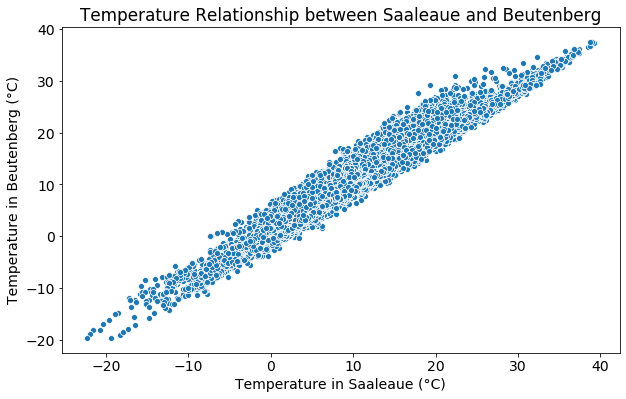

In [5]:
plt.figure(figsize=(10,6))

# Set larger font sizes
plt.rcParams.update({'font.size': 14})

# Scatter plot
sns.scatterplot(x='T_Saaleaue', y='T_Beutenberg', data=df_merged)
plt.xlabel('Temperature in Saaleaue (°C)')
plt.ylabel('Temperature in Beutenberg (°C)')
plt.title('Temperature Relationship between Saaleaue and Beutenberg')
plt.show()

In [6]:
# Calculate the correlation

correlation = df_merged['T_Saaleaue'].corr(df_merged['T_Beutenberg'])
correlation

0.9753165537365354

In [7]:
import statsmodels.api as sm

# Prepare the predictor and the response variables
Y = df_merged['T_Beutenberg']
X = sm.add_constant(df_merged['T_Saaleaue'])  # Adds a constant term to the predictor

In [8]:
X

,const,T_Saaleaue
0,1.0,13.06
1,1.0,13.60
2,1.0,14.79
3,1.0,14.81
4,1.0,16.04
5,1.0,16.29
6,1.0,16.41
7,1.0,16.20
8,1.0,15.22
9,1.0,9.51


In [9]:
Y

0        11.54
1        12.33
2        12.88
3        12.91
4        13.99
         ...  
31951     7.44
31952     7.45
31953     7.11
31954     7.37
31955     7.57
Name: T_Beutenberg, Length: 31956, dtype: float64

In [10]:
# Build and fit the model
model = sm.OLS(Y, X)
model = model.fit()

In [11]:
# Print the results of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           T_Beutenberg   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 6.234e+05
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:58:41   Log-Likelihood:                -63699.
No. Observations:               31956   AIC:                         1.274e+05
Df Residuals:                   31954   BIC:                         1.274e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7189      0.016     43.767      0.0

In [12]:
# Assuming 'model' is your fitted linear regression model
model.params

const         0.718882
T_Saaleaue    0.943411
dtype: float64

In [13]:
intercept = model.params[0] #constant, this number is 'b' in y = mx + b
intercept

0.7188823332522771

In [14]:
slope = model.params[1] #T_Saaleaue, this number is 'm' in y = mx + b
slope

0.9434107529553847

In [15]:
# Assuming 'x_vals' is your independent variable data (e.g., Temperature in Saaleaue)
x_vals = df_merged['T_Saaleaue'].to_numpy()

In [16]:
# Line of best fit: y = mx + b
y_vals = slope * x_vals + intercept

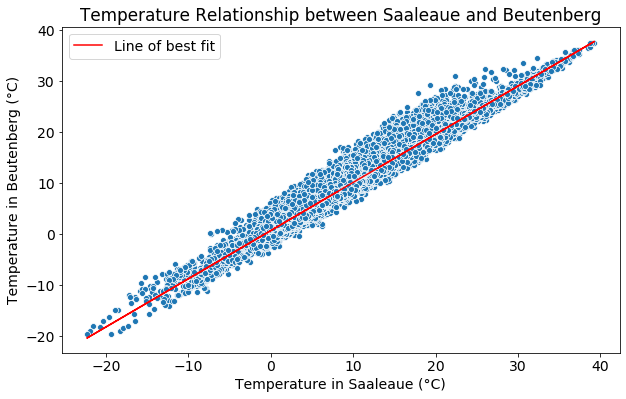

In [17]:
plt.figure(figsize=(10,6))
# Set larger font sizes
plt.rcParams.update({'font.size': 14})

# Original scatter plot
sns.scatterplot(x='T_Saaleaue', y='T_Beutenberg', data=df_merged)

# Line of best fit
plt.plot(x_vals, y_vals, color='red', label='Line of best fit')

# Labeling the axes
plt.xlabel('Temperature in Saaleaue (°C)')
plt.ylabel('Temperature in Beutenberg (°C)')
plt.title('Temperature Relationship between Saaleaue and Beutenberg')
plt.legend()

plt.show()

In [18]:
temperature_saaleaue = 5.2
temperature_beutenberg = slope * temperature_saaleaue + intercept 
temperature_beutenberg

5.624618248620278

In [19]:
# Generate predictions across the observed range to plot the line of best fit
x_vals = df_merged['T_Saaleaue']
y_vals = model.predict(sm.add_constant(x_vals))
y_vals

0        13.039827
1        13.549269
2        14.671927
3        14.690796
4        15.851191
           ...    
31951     8.634099
31952     8.634099
31953     8.652967
31954     8.332207
31955     8.294471
Length: 31956, dtype: float64

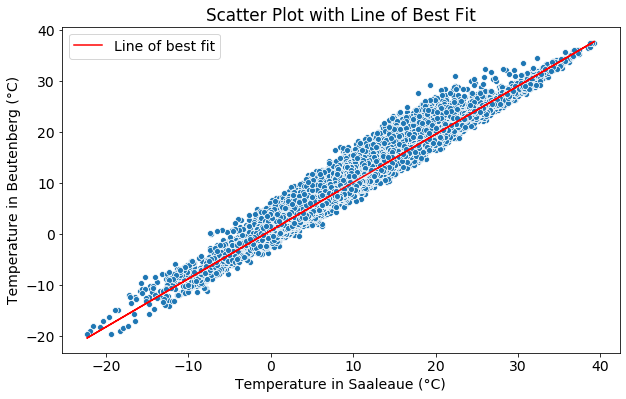

In [20]:
plt.figure(figsize=(10,6))
# Set larger font sizes
plt.rcParams.update({'font.size': 14})

sns.scatterplot(x='T_Saaleaue', y='T_Beutenberg', data=df_merged)
plt.plot(x_vals, y_vals, color='red', label='Line of best fit')  # Line of best fit
plt.xlabel('Temperature in Saaleaue (°C)')
plt.ylabel('Temperature in Beutenberg (°C)')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()
plt.show()